In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

import numpy as np
from glob import glob
from tqdm import tqdm
from joblib import Parallel, delayed
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 13})

In [2]:
from scipy.interpolate import InterpolatedUnivariateSpline as interpolate
PLin = np.loadtxt("PLinear.dat")
kLin = PLin[:,0]
PLin = PLin[:,0+1]
PLinInt = interpolate(kLin,PLin,ext=2)

In [3]:
BoxSize = 1000.
kF = 2*np.pi/BoxSize
nbar = 512**3 / BoxSize**3

bin_centers = np.load('/scratch/p301831/Quijote_Measurements/fiducial/0/Bk_m_256_PCS_fiducial_z=0_0.npy')[:,:3]
squeezed_ordering = np.argsort(bin_centers[:,-1],kind='mergesort')

Pk_k = np.load('/scratch/p301831/Quijote_Measurements/fiducial/0/Pk_m_256_PCS_fiducial_z=0_0.npy')[:81,0]

In [4]:
def load_data_pre(typey):
    files = np.sort(glob(f'/scratch/p301831/Quijote_Measurements/{typey}/0/Pk_m_256_PCS_{typey}_z=0_*.npy'))[:12500]
    Pk_data = np.array(Parallel(n_jobs=-1,verbose=0)([delayed(np.load)(file) for file in files]))
    
    Pk = Pk_data[:,:81,1]-1/nbar
    
    files = np.sort(glob(f'/scratch/p301831/Quijote_Measurements/{typey}/0/Bk_m_256_PCS_{typey}_z=0_*.npy'))[:12500]
    Bk_data = np.array(Parallel(n_jobs=-1,verbose=0)([delayed(np.load)(file) for file in files]))
    
    Pk_B = Bk_data[:,:,3:6]-1/nbar
    Bk = Bk_data[:,:,-2]
    Bk = Bk - (Pk_B).sum(-1)/nbar - 1/nbar**2
    Bk = Bk[:,squeezed_ordering]
    
    Pk_mean = Pk.mean(0)
    Bk_mean = Bk.mean(0)
    
    PB = np.concatenate([Pk,Bk],axis=1)
    PB_mean = PB.mean(0)
    
    return Pk, Pk_mean, Bk, Bk_mean, PB, PB_mean

def load_data_post(typey):
    files = np.sort(glob(f'/scratch/p301831/Quijote_Measurements_Reconstruction/{typey}/Pk_m_256_PCS_{typey}_recon_*.npy'))[:12500]
    Pk_data = np.array(Parallel(n_jobs=-1,verbose=0)([delayed(np.load)(file) for file in files]))
    
    Pk = Pk_data[:,:81,1] * (0.011402733**2 / 0.01052**2) -1/nbar
    
    files = np.sort(glob(f'/scratch/p301831/Quijote_Measurements_Reconstruction/{typey}/Bk_m_256_PCS_{typey}_recon_*.npy'))[:12500]
    Bk_data = np.array(Parallel(n_jobs=-1,verbose=0)([delayed(np.load)(file) for file in files]))
    
    Pk_B = Bk_data[:,:,3:6] * (0.011402733**2 / 0.01052**2) -1/nbar
    Bk = Bk_data[:,:,-2] * (0.011402733**3 / 0.01052**3)
    Bk = Bk - (Pk_B).sum(-1)/nbar - 1/nbar**2
    Bk = Bk[:,squeezed_ordering]
    
    Pk_mean = Pk.mean(0)
    Bk_mean = Bk.mean(0)
    
    PB = np.concatenate([Pk,Bk],axis=1)
    PB_mean = PB.mean(0)
    
    return Pk, Pk_mean, Bk, Bk_mean, PB, PB_mean

## Load the measurements

In [5]:
Pk_fiducial_pre, Pk_fiducial_pre_mean, Bk_fiducial_pre, Bk_fiducial_pre_mean, PB_fiducial_pre, PB_fiducial_pre_mean = load_data_pre('fiducial')

Pk_LC_m_pre, Pk_LC_m_pre_mean, Bk_LC_m_pre, Bk_LC_m_pre_mean, PB_LC_m_pre, PB_LC_m_pre_mean = load_data_pre('LC_m')
Pk_LC_p_pre, Pk_LC_p_pre_mean, Bk_LC_p_pre, Bk_LC_p_pre_mean, PB_LC_p_pre, PB_LC_p_pre_mean = load_data_pre('LC_p')

Pk_EQ_m_pre, Pk_EQ_m_pre_mean, Bk_EQ_m_pre, Bk_EQ_m_pre_mean, PB_EQ_m_pre, PB_EQ_m_pre_mean = load_data_pre('EQ_m')
Pk_EQ_p_pre, Pk_EQ_p_pre_mean, Bk_EQ_p_pre, Bk_EQ_p_pre_mean, PB_EQ_p_pre, PB_EQ_p_pre_mean = load_data_pre('EQ_p')

Pk_OR_LSS_m_pre, Pk_OR_LSS_m_pre_mean, Bk_OR_LSS_m_pre, Bk_OR_LSS_m_pre_mean, PB_OR_LSS_m_pre, PB_OR_LSS_m_pre_mean = load_data_pre('OR_LSS_m')
Pk_OR_LSS_p_pre, Pk_OR_LSS_p_pre_mean, Bk_OR_LSS_p_pre, Bk_OR_LSS_p_pre_mean, PB_OR_LSS_p_pre, PB_OR_LSS_p_pre_mean = load_data_pre('OR_LSS_p')

Pk_h_m_pre, Pk_h_m_pre_mean, Bk_h_m_pre, Bk_h_m_pre_mean, PB_h_m_pre, PB_h_m_pre_mean = load_data_pre('h_m')
Pk_h_p_pre, Pk_h_p_pre_mean, Bk_h_p_pre, Bk_h_p_pre_mean, PB_h_p_pre, PB_h_p_pre_mean = load_data_pre('h_p')

Pk_ns_m_pre, Pk_ns_m_pre_mean, Bk_ns_m_pre, Bk_ns_m_pre_mean, PB_ns_m_pre, PB_ns_m_pre_mean = load_data_pre('ns_m')
Pk_ns_p_pre, Pk_ns_p_pre_mean, Bk_ns_p_pre, Bk_ns_p_pre_mean, PB_ns_p_pre, PB_ns_p_pre_mean = load_data_pre('ns_p')

Pk_Om_m_pre, Pk_Om_m_pre_mean, Bk_Om_m_pre, Bk_Om_m_pre_mean, PB_Om_m_pre, PB_Om_m_pre_mean = load_data_pre('Om_m')
Pk_Om_p_pre, Pk_Om_p_pre_mean, Bk_Om_p_pre, Bk_Om_p_pre_mean, PB_Om_p_pre, PB_Om_p_pre_mean = load_data_pre('Om_p')

Pk_Ob2_m_pre, Pk_Ob2_m_pre_mean, Bk_Ob2_m_pre, Bk_Ob2_m_pre_mean, PB_Ob2_m_pre, PB_Ob2_m_pre_mean = load_data_pre('Ob2_m')
Pk_Ob2_p_pre, Pk_Ob2_p_pre_mean, Bk_Ob2_p_pre, Bk_Ob2_p_pre_mean, PB_Ob2_p_pre, PB_Ob2_p_pre_mean = load_data_pre('Ob2_p')

Pk_s8_m_pre, Pk_s8_m_pre_mean, Bk_s8_m_pre, Bk_s8_m_pre_mean, PB_s8_m_pre, PB_s8_m_pre_mean = load_data_pre('s8_m')
Pk_s8_p_pre, Pk_s8_p_pre_mean, Bk_s8_p_pre, Bk_s8_p_pre_mean, PB_s8_p_pre, PB_s8_p_pre_mean = load_data_pre('s8_p')

In [6]:
Pk_fiducial_post, Pk_fiducial_post_mean, Bk_fiducial_post, Bk_fiducial_post_mean, PB_fiducial_post, PB_fiducial_post_mean = load_data_post('fiducial')

Pk_LC_m_post, Pk_LC_m_post_mean, Bk_LC_m_post, Bk_LC_m_post_mean, PB_LC_m_post, PB_LC_m_post_mean = load_data_post('LC_m')
Pk_LC_p_post, Pk_LC_p_post_mean, Bk_LC_p_post, Bk_LC_p_post_mean, PB_LC_p_post, PB_LC_p_post_mean = load_data_post('LC_p')

Pk_EQ_m_post, Pk_EQ_m_post_mean, Bk_EQ_m_post, Bk_EQ_m_post_mean, PB_EQ_m_post, PB_EQ_m_post_mean = load_data_post('EQ_m')
Pk_EQ_p_post, Pk_EQ_p_post_mean, Bk_EQ_p_post, Bk_EQ_p_post_mean, PB_EQ_p_post, PB_EQ_p_post_mean = load_data_post('EQ_p')

Pk_OR_LSS_m_post, Pk_OR_LSS_m_post_mean, Bk_OR_LSS_m_post, Bk_OR_LSS_m_post_mean, PB_OR_LSS_m_post, PB_OR_LSS_m_post_mean = load_data_post('OR_LSS_m')
Pk_OR_LSS_p_post, Pk_OR_LSS_p_post_mean, Bk_OR_LSS_p_post, Bk_OR_LSS_p_post_mean, PB_OR_LSS_p_post, PB_OR_LSS_p_post_mean = load_data_post('OR_LSS_p')

Pk_h_m_post, Pk_h_m_post_mean, Bk_h_m_post, Bk_h_m_post_mean, PB_h_m_post, PB_h_m_post_mean = load_data_post('h_m')
Pk_h_p_post, Pk_h_p_post_mean, Bk_h_p_post, Bk_h_p_post_mean, PB_h_p_post, PB_h_p_post_mean = load_data_post('h_p')

Pk_ns_m_post, Pk_ns_m_post_mean, Bk_ns_m_post, Bk_ns_m_post_mean, PB_ns_m_post, PB_ns_m_post_mean = load_data_post('ns_m')
Pk_ns_p_post, Pk_ns_p_post_mean, Bk_ns_p_post, Bk_ns_p_post_mean, PB_ns_p_post, PB_ns_p_post_mean = load_data_post('ns_p')

Pk_Om_m_post, Pk_Om_m_post_mean, Bk_Om_m_post, Bk_Om_m_post_mean, PB_Om_m_post, PB_Om_m_post_mean = load_data_post('Om_m')
Pk_Om_p_post, Pk_Om_p_post_mean, Bk_Om_p_post, Bk_Om_p_post_mean, PB_Om_p_post, PB_Om_p_post_mean = load_data_post('Om_p')

Pk_Ob2_m_post, Pk_Ob2_m_post_mean, Bk_Ob2_m_post, Bk_Ob2_m_post_mean, PB_Ob2_m_post, PB_Ob2_m_post_mean = load_data_post('Ob2_m')
Pk_Ob2_p_post, Pk_Ob2_p_post_mean, Bk_Ob2_p_post, Bk_Ob2_p_post_mean, PB_Ob2_p_post, PB_Ob2_p_post_mean = load_data_post('Ob2_p')

Pk_s8_m_post, Pk_s8_m_post_mean, Bk_s8_m_post, Bk_s8_m_post_mean, PB_s8_m_post, PB_s8_m_post_mean = load_data_post('s8_m')
Pk_s8_p_post, Pk_s8_p_post_mean, Bk_s8_p_post, Bk_s8_p_post_mean, PB_s8_p_post, PB_s8_p_post_mean = load_data_post('s8_p')

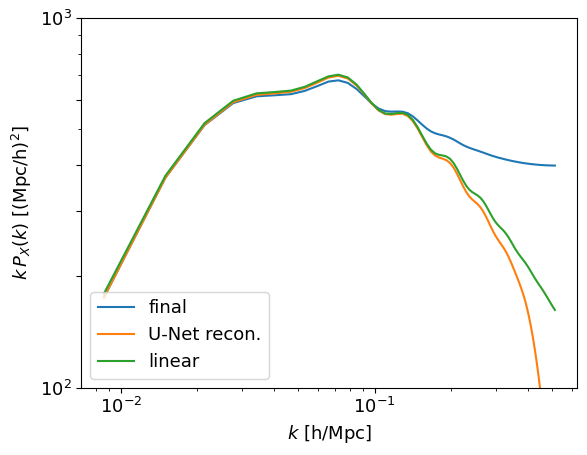

In [7]:
plt.loglog(Pk_k,Pk_k**1 * Pk_fiducial_pre_mean,label='final')
plt.loglog(Pk_k,Pk_k**1 * Pk_fiducial_post_mean,label='U-Net recon.')
plt.loglog(Pk_k,Pk_k**1 * PLinInt(Pk_k),label='linear')
plt.xlabel('$k$ [h/Mpc]')
plt.ylabel('$k\,P_X(k)$ [(Mpc/h)$^2$]')
# plt.grid(linestyle=':')
plt.legend(loc=3)
# plt.xlim(1e-1,5e-1)
plt.ylim(1e2,1e3)
plt.yticks([1e2,2e2,3e2,4e2,6e2,1e3],["$10^2$","","","","","$10^3$"])
plt.savefig('results/P_reconstruction_real.pdf',format='pdf',bbox_inches='tight')
plt.show()

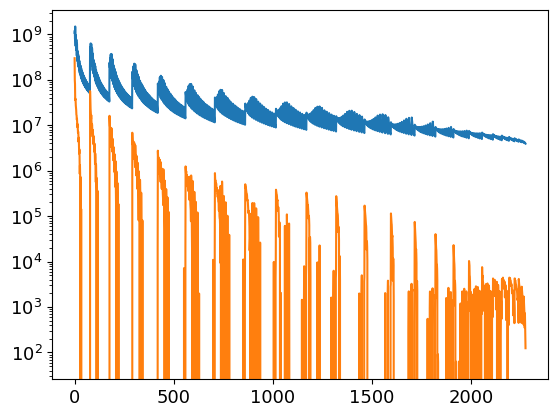

In [73]:
plt.semilogy(Bk_fiducial_pre_mean)
plt.semilogy(Bk_fiducial_post_mean)
plt.show()

### Compute the covariance

12500 81 0.9934394751580127
12500 81 0.9934394751580127
12500 162 0.9869589567165373


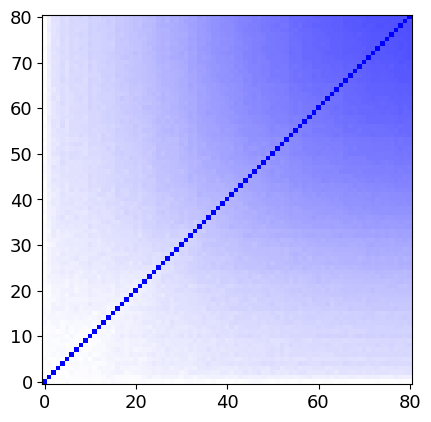

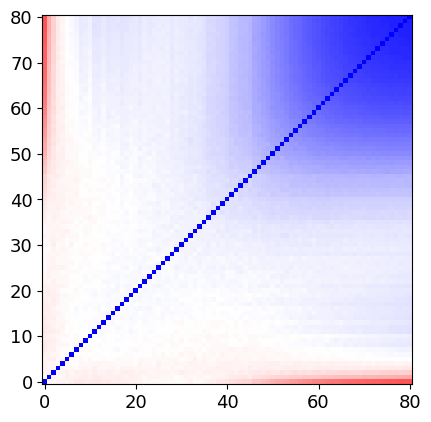

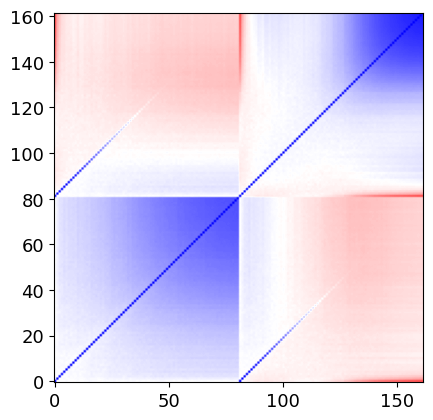

In [8]:
Cov_P_pre = np.cov(Pk_fiducial_pre.T)
Cov_P_pre_Inv = np.linalg.inv(Cov_P_pre)

N_sims = len(Pk_fiducial_pre)
N_bins = len(Cov_P_pre)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_P_pre_Inv_wHartlap = Cov_P_pre_Inv * hartlapfactor

r_P_pre = np.corrcoef(Pk_fiducial_pre.T)

Cov_P_post = np.cov(Pk_fiducial_post.T)
Cov_P_post_Inv = np.linalg.inv(Cov_P_post)

N_sims = len(Pk_fiducial_post)
N_bins = len(Cov_P_post)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_P_post_Inv_wHartlap = Cov_P_post_Inv * hartlapfactor

r_P_post = np.corrcoef(Pk_fiducial_post.T)

Pk_fiducial_both = np.concatenate([Pk_fiducial_pre,Pk_fiducial_post],axis=-1)
Cov_P_both = np.cov(Pk_fiducial_both.T)
Cov_P_both_Inv = np.linalg.inv(Cov_P_both)

N_sims = len(Pk_fiducial_both)
N_bins = len(Cov_P_both)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_P_both_Inv_wHartlap = Cov_P_both_Inv * hartlapfactor

r_P_both = np.corrcoef(Pk_fiducial_both.T)

plt.imshow(r_P_pre,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()
plt.imshow(r_P_post,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()
plt.imshow(r_P_both,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()

12500 2276 0.8178254260340827
12500 2276 0.8178254260340827
12500 4552 0.6357308584686775


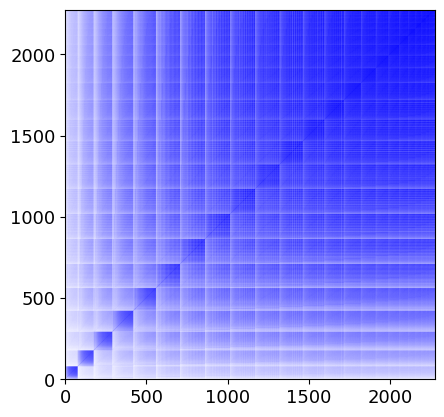

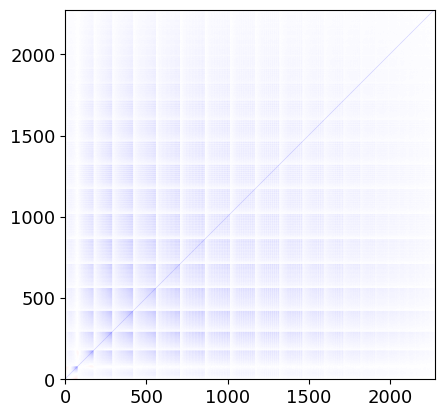

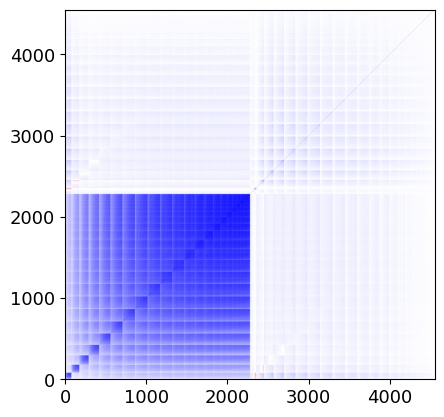

In [9]:
Cov_B_pre = np.cov(Bk_fiducial_pre.T)
Cov_B_pre_Inv = np.linalg.inv(Cov_B_pre)

N_sims = len(Bk_fiducial_pre)
N_bins = len(Cov_B_pre)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_B_pre_Inv_wHartlap = Cov_B_pre_Inv * hartlapfactor

r_B_pre = np.corrcoef(Bk_fiducial_pre.T)#[squeezed_ordering,:][:,squeezed_ordering]

Cov_B_post = np.cov(Bk_fiducial_post.T)
Cov_B_post_Inv = np.linalg.inv(Cov_B_post)

N_sims = len(Bk_fiducial_post)
N_bins = len(Cov_B_post)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_B_post_Inv_wHartlap = Cov_B_post_Inv * hartlapfactor

r_B_post = np.corrcoef(Bk_fiducial_post.T)#[squeezed_ordering,:][:,squeezed_ordering]

Bk_fiducial_both = np.concatenate([Bk_fiducial_pre,Bk_fiducial_post],axis=-1)
Cov_B_both = np.cov(Bk_fiducial_both.T)
Cov_B_both_Inv = np.linalg.inv(Cov_B_both)

N_sims = len(Bk_fiducial_both)
N_bins = len(Cov_B_both)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_B_both_Inv_wHartlap = Cov_B_both_Inv * hartlapfactor

r_B_both = np.corrcoef(Bk_fiducial_both.T)#[np.concatenate([squeezed_ordering,squeezed_ordering+len(Cov_B_pre)]),:][:,np.concatenate([squeezed_ordering,squeezed_ordering+len(Cov_B_pre)])]

plt.imshow(r_B_pre,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()
plt.imshow(r_B_post,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()
plt.imshow(r_B_both,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()

12500 2357 0.8113449075926074
12500 2357 0.8113449075926074
12500 4714 0.6227698215857269


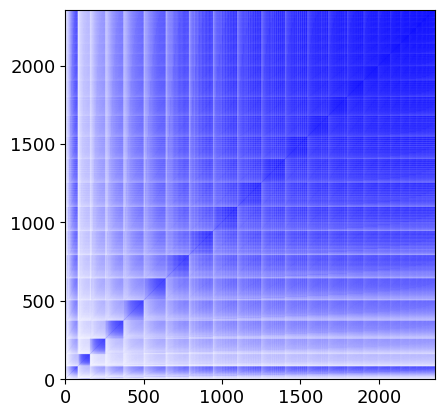

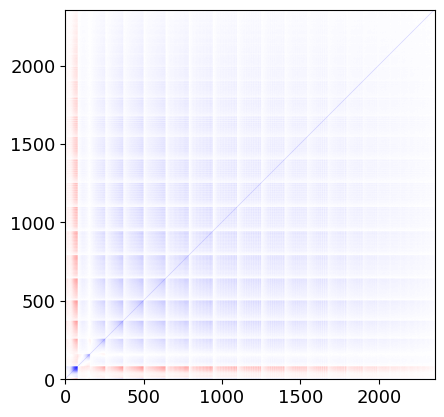

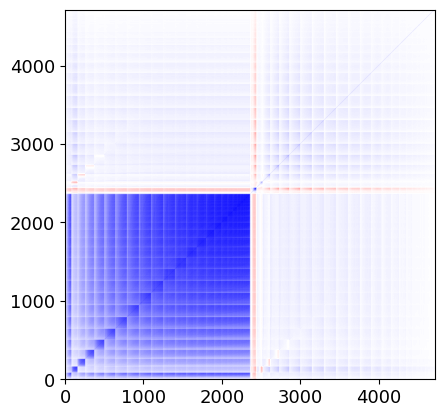

In [10]:
Cov_PB_pre = np.cov(PB_fiducial_pre.T)
Cov_PB_pre_Inv = np.linalg.inv(Cov_PB_pre)

N_sims = len(PB_fiducial_pre)
N_bins = len(Cov_PB_pre)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_PB_pre_Inv_wHartlap = Cov_PB_pre_Inv * hartlapfactor

r_PB_pre = np.corrcoef(PB_fiducial_pre.T)#[np.concatenate([np.arange(81),squeezed_ordering+81]),:][:,np.concatenate([np.arange(81),squeezed_ordering+81])]

Cov_PB_post = np.cov(PB_fiducial_post.T)
Cov_PB_post_Inv = np.linalg.inv(Cov_PB_post)

N_sims = len(PB_fiducial_post)
N_bins = len(Cov_PB_post)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_PB_post_Inv_wHartlap = Cov_PB_post_Inv * hartlapfactor

r_PB_post = np.corrcoef(PB_fiducial_post.T)#[np.concatenate([np.arange(81),squeezed_ordering+81]),:][:,np.concatenate([np.arange(81),squeezed_ordering+81])]

PB_fiducial_both = np.concatenate([PB_fiducial_pre,PB_fiducial_post],axis=-1)
Cov_PB_both = np.cov(PB_fiducial_both.T)
Cov_PB_both_Inv = np.linalg.inv(Cov_PB_both)

N_sims = len(PB_fiducial_both)
N_bins = len(Cov_PB_both)
hartlapfactor = (N_sims - N_bins - 2) / (N_sims - 1)
print(N_sims,N_bins,hartlapfactor)
Cov_PB_both_Inv_wHartlap = Cov_PB_both_Inv * hartlapfactor

r_PB_both = np.corrcoef(PB_fiducial_both.T)

plt.imshow(r_PB_pre,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()
plt.imshow(r_PB_post,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()
plt.imshow(r_PB_both,cmap='bwr_r',vmin=-1,vmax=1,origin='lower')
plt.show()

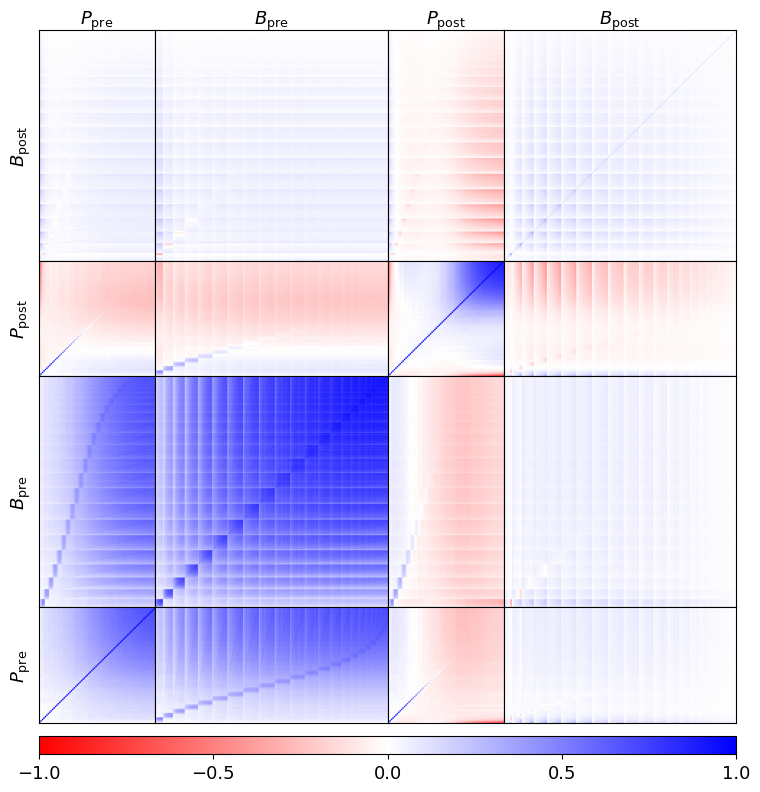

In [14]:
fig, axs = plt.subplots(4, 4, figsize=[9, 9],width_ratios=[1,2,1,2],height_ratios=[2,1,2,1])
fig.subplots_adjust(hspace=0,wspace=0)

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.set_label_position('top')
    ax.yaxis.set_label_position('left')

axs[3,0].imshow(r_P_pre,cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')
axs[2,1].imshow(r_B_pre,cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')
axs[1,2].imshow(r_P_post,cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')
axs[0,3].imshow(r_B_post,cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')

axs[1,0].imshow(r_P_both[81:,:81],cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')
axs[3,2].imshow(r_P_both[:81,81:],cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')

axs[0,1].imshow(r_B_both[2276:,:2276],cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')
axs[2,3].imshow(r_B_both[:2276,2276:],cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')

axs[2,0].imshow(r_PB_pre[81:,:81],cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')
axs[3,1].imshow(r_PB_pre[:81,81:],cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')

axs[0,2].imshow(r_PB_post[81:,:81],cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')
axs[1,3].imshow(r_PB_post[:81,81:],cmap='bwr_r',origin='lower',vmin=-1,vmax=1,aspect='auto')

axs[0,0].imshow(r_PB_both[:81,81+len(Cov_PB_pre):].T,cmap='bwr_r',vmin=-1,vmax=1,origin='lower',aspect='auto')
axs[3,3].imshow(r_PB_both[:81,81+len(Cov_PB_pre):],cmap='bwr_r',vmin=-1,vmax=1,origin='lower',aspect='auto')

axs[1,1].imshow(r_PB_both[len(Cov_PB_pre):len(Cov_PB_pre)+81,81:81+len(Cov_B_pre)],cmap='bwr_r',vmin=-1,vmax=1,origin='lower',aspect='auto')
ploty = axs[2,2].imshow(r_PB_both[len(Cov_PB_pre):len(Cov_PB_pre)+81,81:81+len(Cov_B_pre)].T,cmap='bwr_r',vmin=-1,vmax=1,origin='lower',aspect='auto')

axs[0,0].set_xlabel("$P_{\\rm pre}$")
axs[0,1].set_xlabel("$B_{\\rm pre}$")
axs[0,2].set_xlabel("$P_{\\rm post}$")
axs[0,3].set_xlabel("$B_{\\rm post}$")

axs[0,0].set_ylabel("$B_{\\rm post}$")
axs[1,0].set_ylabel("$P_{\\rm post}$")
axs[2,0].set_ylabel("$B_{\\rm pre}$")
axs[3,0].set_ylabel("$P_{\\rm pre}$")
cbar_ax = fig.add_axes([0.125, 0.075, 0.775, 0.02])
fig.colorbar(ploty,cax=cbar_ax,ticks=[-1,-0.5,0,0.5,1],location='bottom')
plt.savefig("results/r_all.pdf",format='pdf',bbox_inches='tight')
plt.show()

## Compute the derivatives with respect to parameters

In [15]:
params = ["$f_{\\rm NL}^{\\rm local}$","$f_{\\rm NL}^{\\rm equil}$","$f_{\\rm NL}^{\\rm orth}$","h","$n_{s}$","$\\Omega_{m}$","$\\Omega_{b}$","$\\sigma_{8}$"]
means = [0,0,0,0.6711,0.9624,0.3175,0.049,0.834]

In [16]:
dPdf_pre = np.zeros((8,Pk_fiducial_pre_mean.shape[0]))
dPdf_pre[0] = (Pk_LC_p_pre_mean - Pk_LC_m_pre_mean)/200.
dPdf_pre[1] = (Pk_EQ_p_pre_mean - Pk_EQ_m_pre_mean)/200.
dPdf_pre[2] = (Pk_OR_LSS_p_pre_mean - Pk_OR_LSS_m_pre_mean)/200.
dPdf_pre[3] = (Pk_h_p_pre_mean - Pk_h_m_pre_mean)/(0.6911-0.6511)
dPdf_pre[4] = (Pk_ns_p_pre_mean - Pk_ns_m_pre_mean)/(0.9824-0.9424)
dPdf_pre[5] = (Pk_Om_p_pre_mean - Pk_Om_m_pre_mean)/(0.3275-0.3075)
dPdf_pre[6] = (Pk_Ob2_p_pre_mean - Pk_Ob2_m_pre_mean)/(0.051-0.047)
dPdf_pre[7] = (Pk_s8_p_pre_mean - Pk_s8_m_pre_mean)/(0.849-0.819)

dPdf_post = np.zeros((8,Pk_fiducial_post_mean.shape[0]))
dPdf_post[0] = (Pk_LC_p_post_mean - Pk_LC_m_post_mean)/200.
dPdf_post[1] = (Pk_EQ_p_post_mean - Pk_EQ_m_post_mean)/200.
dPdf_post[2] = (Pk_OR_LSS_p_post_mean - Pk_OR_LSS_m_post_mean)/200.
dPdf_post[3] = (Pk_h_p_post_mean - Pk_h_m_post_mean)/(0.6911-0.6511)
dPdf_post[4] = (Pk_ns_p_post_mean - Pk_ns_m_post_mean)/(0.9824-0.9424)
dPdf_post[5] = (Pk_Om_p_post_mean - Pk_Om_m_post_mean)/(0.3275-0.3075)
dPdf_post[6] = (Pk_Ob2_p_post_mean - Pk_Ob2_m_post_mean)/(0.051-0.047)
dPdf_post[7] = (Pk_s8_p_post_mean - Pk_s8_m_post_mean)/(0.849-0.819)

dPdf_both = np.concatenate([dPdf_pre,dPdf_post],axis=-1)

In [17]:
dBdf_pre = np.zeros((8,Bk_fiducial_pre_mean.shape[0]))
dBdf_pre[0] = (Bk_LC_p_pre_mean - Bk_LC_m_pre_mean)/200.
dBdf_pre[1] = (Bk_EQ_p_pre_mean - Bk_EQ_m_pre_mean)/200.
dBdf_pre[2] = (Bk_OR_LSS_p_pre_mean - Bk_OR_LSS_m_pre_mean)/200.
dBdf_pre[3] = (Bk_h_p_pre_mean - Bk_h_m_pre_mean)/(0.6911-0.6511)
dBdf_pre[4] = (Bk_ns_p_pre_mean - Bk_ns_m_pre_mean)/(0.9824-0.9424)
dBdf_pre[5] = (Bk_Om_p_pre_mean - Bk_Om_m_pre_mean)/(0.3275-0.3075)
dBdf_pre[6] = (Bk_Ob2_p_pre_mean - Bk_Ob2_m_pre_mean)/(0.051-0.047)
dBdf_pre[7] = (Bk_s8_p_pre_mean - Bk_s8_m_pre_mean)/(0.849-0.819)

dBdf_post = np.zeros((8,Bk_fiducial_post_mean.shape[0]))
dBdf_post[0] = (Bk_LC_p_post_mean - Bk_LC_m_post_mean)/200.
dBdf_post[1] = (Bk_EQ_p_post_mean - Bk_EQ_m_post_mean)/200.
dBdf_post[2] = (Bk_OR_LSS_p_post_mean - Bk_OR_LSS_m_post_mean)/200.
dBdf_post[3] = (Bk_h_p_post_mean - Bk_h_m_post_mean)/(0.6911-0.6511)
dBdf_post[4] = (Bk_ns_p_post_mean - Bk_ns_m_post_mean)/(0.9824-0.9424)
dBdf_post[5] = (Bk_Om_p_post_mean - Bk_Om_m_post_mean)/(0.3275-0.3075)
dBdf_post[6] = (Bk_Ob2_p_post_mean - Bk_Ob2_m_post_mean)/(0.051-0.047)
dBdf_post[7] = (Bk_s8_p_post_mean - Bk_s8_m_post_mean)/(0.849-0.819)

dBdf_both = np.concatenate([dBdf_pre,dBdf_post],axis=-1)

In [18]:
dPBdf_pre = np.zeros((8,PB_fiducial_pre_mean.shape[0]))
dPBdf_pre[0] = (PB_LC_p_pre_mean - PB_LC_m_pre_mean)/200.
dPBdf_pre[1] = (PB_EQ_p_pre_mean - PB_EQ_m_pre_mean)/200.
dPBdf_pre[2] = (PB_OR_LSS_p_pre_mean - PB_OR_LSS_m_pre_mean)/200.
dPBdf_pre[3] = (PB_h_p_pre_mean - PB_h_m_pre_mean)/(0.6911-0.6511)
dPBdf_pre[4] = (PB_ns_p_pre_mean - PB_ns_m_pre_mean)/(0.9824-0.9424)
dPBdf_pre[5] = (PB_Om_p_pre_mean - PB_Om_m_pre_mean)/(0.3275-0.3075)
dPBdf_pre[6] = (PB_Ob2_p_pre_mean - PB_Ob2_m_pre_mean)/(0.051-0.047)
dPBdf_pre[7] = (PB_s8_p_pre_mean - PB_s8_m_pre_mean)/(0.849-0.819)

dPBdf_post = np.zeros((8,PB_fiducial_post_mean.shape[0]))
dPBdf_post[0] = (PB_LC_p_post_mean - PB_LC_m_post_mean)/200.
dPBdf_post[1] = (PB_EQ_p_post_mean - PB_EQ_m_post_mean)/200.
dPBdf_post[2] = (PB_OR_LSS_p_post_mean - PB_OR_LSS_m_post_mean)/200.
dPBdf_post[3] = (PB_h_p_post_mean - PB_h_m_post_mean)/(0.6911-0.6511)
dPBdf_post[4] = (PB_ns_p_post_mean - PB_ns_m_post_mean)/(0.9824-0.9424)
dPBdf_post[5] = (PB_Om_p_post_mean - PB_Om_m_post_mean)/(0.3275-0.3075)
dPBdf_post[6] = (PB_Ob2_p_post_mean - PB_Ob2_m_post_mean)/(0.051-0.047)
dPBdf_post[7] = (PB_s8_p_post_mean - PB_s8_m_post_mean)/(0.849-0.819)

dPBdf_both = np.concatenate([dPBdf_pre,dPBdf_post],axis=-1)

## Compute the Fisher Matrices

In [19]:
Fish_P_pre = dPdf_pre.dot(Cov_P_pre_Inv_wHartlap).dot(dPdf_pre.T)
Fish_P_post = dPdf_post.dot(Cov_P_post_Inv_wHartlap).dot(dPdf_post.T)
Fish_P_both = dPdf_both.dot(Cov_P_both_Inv_wHartlap).dot(dPdf_both.T)

Fish_P_pre_Inv = np.linalg.inv(Fish_P_pre)
Fish_P_post_Inv = np.linalg.inv(Fish_P_post)
Fish_P_both_Inv = np.linalg.inv(Fish_P_both)

In [20]:
Fish_B_pre = dBdf_pre.dot(Cov_B_pre_Inv_wHartlap).dot(dBdf_pre.T)
Fish_B_post = dBdf_post.dot(Cov_B_post_Inv_wHartlap).dot(dBdf_post.T)
Fish_B_both = dBdf_both.dot(Cov_B_both_Inv_wHartlap).dot(dBdf_both.T)

Fish_B_pre_Inv = np.linalg.inv(Fish_B_pre)
Fish_B_post_Inv = np.linalg.inv(Fish_B_post)
Fish_B_both_Inv = np.linalg.inv(Fish_B_both)

In [21]:
Fish_PB_pre = dPBdf_pre.dot(Cov_PB_pre_Inv_wHartlap).dot(dPBdf_pre.T)
Fish_PB_post = dPBdf_post.dot(Cov_PB_post_Inv_wHartlap).dot(dPBdf_post.T)
Fish_PB_both = dPBdf_both.dot(Cov_PB_both_Inv_wHartlap).dot(dPBdf_both.T)

Fish_PB_pre_Inv = np.linalg.inv(Fish_PB_pre)
Fish_PB_post_Inv = np.linalg.inv(Fish_PB_post)
Fish_PB_both_Inv = np.linalg.inv(Fish_PB_both)

In [22]:
from IPython.display import display, Latex

for i,param in enumerate(params):
    display(Latex(param))
    print("\t P")
    for fishy in [Fish_P_pre,Fish_P_post,Fish_P_both]:
        fishy_inv = np.linalg.inv(fishy)
        print(fishy_inv[i,i]**.5,fishy[i,i]**-.5,)
        
    print("\t B")
    for fishy in [Fish_B_pre,Fish_B_post,Fish_B_both]:
        fishy_inv = np.linalg.inv(fishy)
        print(fishy_inv[i,i]**.5,fishy[i,i]**-.5,)
        
    print("\t PB")
    for fishy in [Fish_PB_pre,Fish_PB_post,Fish_PB_both]:
        fishy_inv = np.linalg.inv(fishy)
        print(fishy_inv[i,i]**.5,fishy[i,i]**-.5,)

<IPython.core.display.Latex object>

	 P
2883.767816584986 31.314695293001066
1889.978964312037 69.10750027371222
135.61717438423872 29.057819198891508
	 B
101.82983484028313 42.65239420909092
18.346493885224962 16.858731366791904
16.93550581186495 15.610444778522428
	 PB
51.644373815276914 24.4464247540832
17.104603096586132 15.612427073647186
14.14238968624564 12.77382394354893


<IPython.core.display.Latex object>

	 P
7888.210283629742 79.40598363005603
3500.4062926016695 165.51187314256157
481.1562562495048 76.93610680328459
	 B
187.70989596096223 123.78291233363456
72.63216512044174 34.24754986395607
60.64518268360674 33.053879264605676
	 PB
159.27290024259392 59.77224502519165
64.73059317812535 32.582082355115084
45.005112370348165 30.211106003938838


<IPython.core.display.Latex object>

	 P
3477.9738626263206 187.16693940804433
571.6974185468206 117.2403221724801
175.3484709127457 77.70483880836977
	 B
83.39124947904268 61.38927854309287
26.7642984423748 16.85182178816403
22.034047291646868 15.510556091328763
	 PB
49.07587774103021 42.560027133872886
22.580748215473708 15.485584115992115
16.93144686928085 13.903508552966603


<IPython.core.display.Latex object>

	 P
0.4256090228298193 0.011244629639915247
0.07555594214035541 0.010030275871769984
0.05119122797857593 0.008373853369462012
	 B
0.16283753090457517 0.015103374987715391
0.11589754707702123 0.010700604920617111
0.08427061835295675 0.009721135446938664
	 PB
0.08697136786212392 0.008544784104790003
0.03708050883091449 0.007997436102183042
0.03585933216934736 0.00613737664073018


<IPython.core.display.Latex object>

	 P
0.4812861708128113 0.008906178202967461
0.1050358741164172 0.009465423191897996
0.060638764188527074 0.00730863576879018
	 B
0.1502721417269916 0.0129637503526787
0.07810260683462564 0.008014685229954969
0.06203983451810908 0.0073895943066908595
	 PB
0.0621244695788058 0.0065742077604571125
0.035967716701518784 0.006485270697936821
0.031403558632618664 0.004822559477048773


<IPython.core.display.Latex object>

	 P
0.06652955028297286 0.004226336027750358
0.02026476358462838 0.003756848181796112
0.012714281801105605 0.0032040096593662147
	 B
0.026698406121495297 0.005484228174558951
0.017919846832909668 0.003986460529584666
0.013661983675839798 0.003644269752985176
	 PB
0.013086078789459058 0.0032470394181541872
0.008551402856475125 0.0030418146346601342
0.008001954401878534 0.0023728286615686592


<IPython.core.display.Latex object>

	 P
0.031312089232277796 0.0024116336440121065
0.004505746630369245 0.0014580146614617657
0.0037064028017808016 0.0013626846186201292
	 B
0.013234179933716915 0.00274783455783339
0.011552755282851573 0.002399754425853217
0.008062555167779687 0.0020409305162676127
	 PB
0.008326653049787063 0.0018590464415813028
0.003281557511237531 0.0013525957169875215
0.003253281921277007 0.0011818917446397503


<IPython.core.display.Latex object>

	 P
0.08230460891695192 0.0021003817141140696
0.03511206339871883 0.005394699210227053
0.005884009345312404 0.0017133353605958055
	 B
0.0085330377843028 0.0030180584445677542
0.005811446010644728 0.003371684463693978
0.003029608474962412 0.0022466614566564853
	 PB
0.002996522232874894 0.0014582842265122673
0.004242470085368864 0.0028324632900106938
0.0015693210543989123 0.0011877308335525199


In [60]:
np.diag(Fish_PB_pre_Inv)**.5 / np.diag(Fish_PB_both_Inv)**.5

array([3.65174309, 3.53899572, 2.89850467, 2.42534823, 1.97826209,
       1.63536033, 2.55946249, 1.90943862])

## Show the correlation coefficients

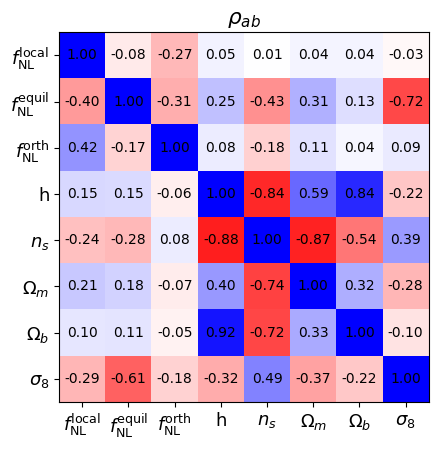

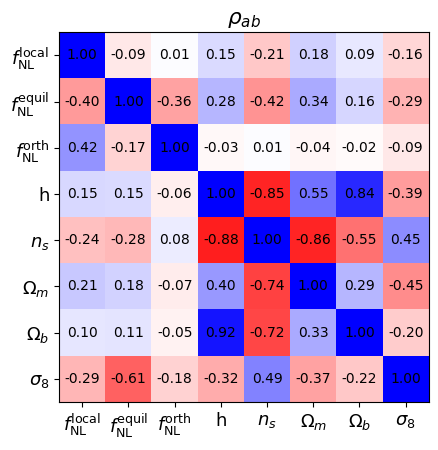

In [25]:
rho_pre = Fish_PB_pre_Inv/np.sqrt(np.outer(np.diag(Fish_PB_pre_Inv),np.diag(Fish_PB_pre_Inv)))
rho_post = Fish_PB_post_Inv/np.sqrt(np.outer(np.diag(Fish_PB_post_Inv),np.diag(Fish_PB_post_Inv)))
rho_both = Fish_PB_both_Inv/np.sqrt(np.outer(np.diag(Fish_PB_both_Inv),np.diag(Fish_PB_both_Inv)))

rho_prepost = np.tril(rho_pre) + np.triu(rho_post) - np.diag(np.ones(8))
rho_preboth = np.tril(rho_pre) + np.triu(rho_both) - np.diag(np.ones(8))

plt.imshow(rho_prepost,cmap='bwr_r',origin='upper',vmin=-1,vmax=1)
plt.xticks(np.arange(8),params)
plt.yticks(np.arange(8),params)
plt.title('$\\rho_{ab}$')
for (j,i),label in np.ndenumerate(rho_prepost):
    plt.text(i,j,f"{label:.2f}",ha='center',va='center',fontsize=10) 
plt.savefig('results/rhoab_prepost.pdf',format='pdf',bbox_inches='tight')
plt.show()

plt.imshow(rho_preboth,cmap='bwr_r',origin='upper',vmin=-1,vmax=1)
plt.xticks(np.arange(8),params)
plt.yticks(np.arange(8),params)
plt.title('$\\rho_{ab}$')
for (j,i),label in np.ndenumerate(rho_preboth):
    plt.text(i,j,f"{label:.2f}",ha='center',va='center',fontsize=10) 
plt.savefig('results/rhoab_preboth.pdf',format='pdf',bbox_inches='tight')
plt.show()

## Make the corner plots

In [26]:
from plot_ellipse import plot_ellipse

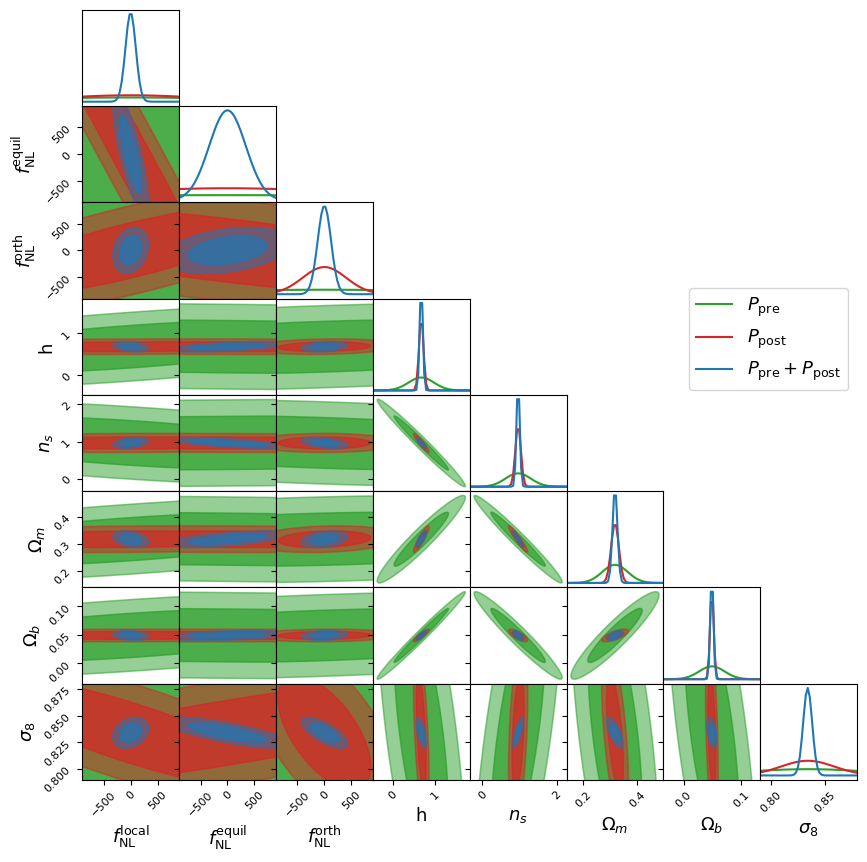

In [27]:
fig, axes = plt.subplots(figsize=(10, 10), sharey='row', sharex='col', ncols=8, nrows=8)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

x = np.linspace(0, 10, 100)
axes[0,0].set_yticks([])
for i in range(8):
    axes[i,0].set_ylabel(params[i])
    for j in range(8):
        axes[i,j].tick_params(axis='both', which='major', labelsize=8,rotation=45)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        if i<=j:
            axes[i, j].axis('off')
        else:

            axes[i,j].set_xlabel(params[j])
            
            
            C = Fish_P_pre_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.5,'c':'tab:green'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.7,'c':'tab:green'})
            
            C = Fish_P_post_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.7,'c':'tab:red'})
            
            C = Fish_P_both_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.5,'c':'tab:blue'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.7,'c':'tab:blue'})
            # C = FishNG_PB_mix_Inv[-1][[j,i],:][:,[j,i]]
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.3,'c':'tab:red'})
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})

axes[1,0].set_ylim(-900,900)
axes[0,0].set_xlim(-900,900)
axes[1,1].set_xlim(-900,900)
axes[2,2].set_xlim(-900,900)
axes[2,0].set_ylim(-900,900)
axes[-1,0].set_ylim(0.79,0.88)               
            
axes[0,0].set_ylim(axes[0,0].get_xlim())
axes[-1,-1].set_xlim(axes[-1,-1].get_ylim())
a=1
for i in range(8):
    for j in range(8):
        if i==j:
            ax1 = fig.add_subplot(8,8,a)
            xlims = axes[i,i].get_xlim()
            ax1.set_xlim(xlims)
            ax1.set_yticks([])
            if i!=7: ax1.set_xticks([])
            ax1.tick_params(axis='both', which='major', labelsize=8,rotation=45)
            xx = np.linspace(xlims[0],xlims[1])
    
            
            sigma2 = Fish_P_pre_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:green')
            
            sigma2 = Fish_P_post_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:red')
            
            sigma2 = Fish_P_both_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:blue')
            
            # sigma2 = FishNG_PB_mix_Inv[-1][i,i]
            # ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2),'tab:red')
        a+=1 
ax1.set_xlabel(params[-1])
plt.legend(['$P_{\\rm{pre}}$','$P_{\\rm{post}}$','$P_{\\rm{pre}}+P_{\\rm{post}}$'],bbox_to_anchor=[1.0,5.2])
plt.savefig('results/cornerplot_P.pdf',format='pdf',bbox_inches='tight')
plt.show()

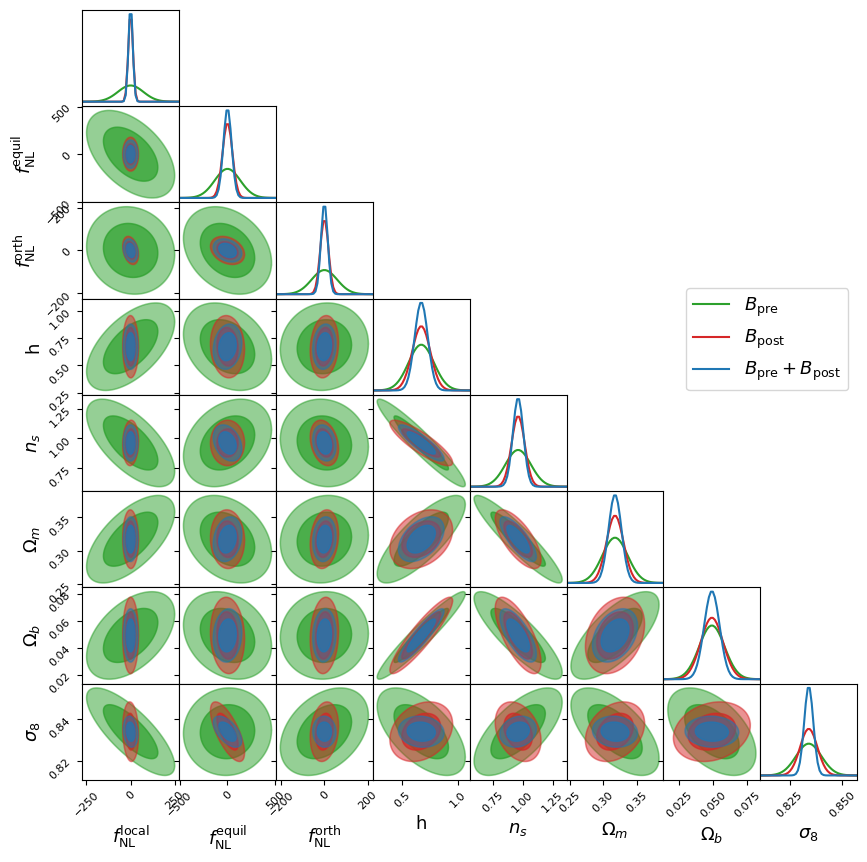

In [28]:
fig, axes = plt.subplots(figsize=(10, 10), sharey='row', sharex='col', ncols=8, nrows=8)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

x = np.linspace(0, 10, 100)
axes[0,0].set_yticks([])
for i in range(8):
    axes[i,0].set_ylabel(params[i])
    for j in range(8):
        axes[i,j].tick_params(axis='both', which='major', labelsize=8,rotation=45)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        if i<=j:
            axes[i, j].axis('off')
        else:

            axes[i,j].set_xlabel(params[j])
            
            
            C = Fish_B_pre_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.5,'c':'tab:green'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.7,'c':'tab:green'})
            
            C = Fish_B_post_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.7,'c':'tab:red'})
            
            C = Fish_B_both_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.5,'c':'tab:blue'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.7,'c':'tab:blue'})
            # C = FishNG_PB_mix_Inv[-1][[j,i],:][:,[j,i]]
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.3,'c':'tab:red'})
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})
axes[0,0].set_ylim(axes[0,0].get_xlim())
axes[-1,-1].set_xlim(axes[-1,-1].get_ylim())
a=1
for i in range(8):
    for j in range(8):
        if i==j:
            ax1 = fig.add_subplot(8,8,a)
            xlims = axes[i,i].get_xlim()
            ax1.set_xlim(xlims)
            ax1.set_yticks([])
            if i!=7: ax1.set_xticks([])
            ax1.tick_params(axis='both', which='major', labelsize=8,rotation=45)
            xx = np.linspace(xlims[0],xlims[1])
    
            
            sigma2 = Fish_B_pre_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:green')
            
            sigma2 = Fish_B_post_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:red')
            
            sigma2 = Fish_B_both_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:blue')
            
            # sigma2 = FishNG_PB_mix_Inv[-1][i,i]
            # ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2),'tab:red')
        a+=1 
ax1.set_xlabel(params[-1])
plt.legend(['$B_{\\rm pre}$','$B_{\\rm post}$','$B_{\\rm pre}+B_{\\rm post}$'],bbox_to_anchor=[1.0,5.2])
plt.savefig('results/cornerplot_B.pdf',format='pdf',bbox_inches='tight')
plt.show()

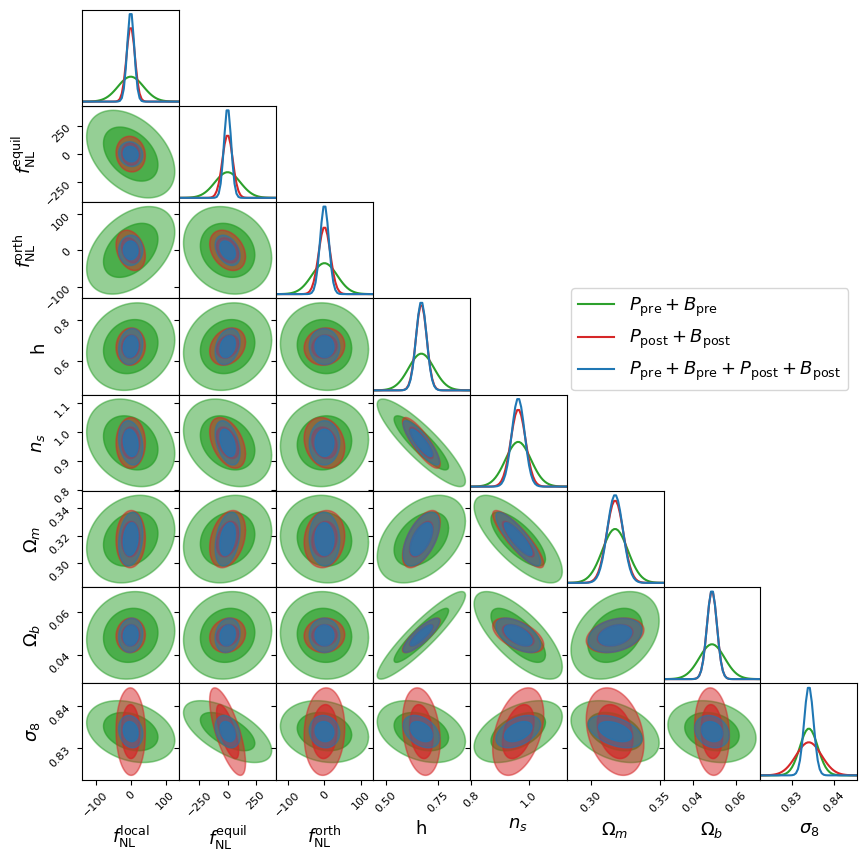

In [29]:
fig, axes = plt.subplots(figsize=(10, 10), sharey='row', sharex='col', ncols=8, nrows=8)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

x = np.linspace(0, 10, 100)
axes[0,0].set_yticks([])
for i in range(8):
    axes[i,0].set_ylabel(params[i])
    for j in range(8):
        axes[i,j].tick_params(axis='both', which='major', labelsize=8,rotation=45)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        if i<=j:
            axes[i, j].axis('off')
        else:

            axes[i,j].set_xlabel(params[j])
            
            
            C = Fish_PB_pre_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.5,'c':'tab:green'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:green'}, fill_kwargs={'alpha':0.7,'c':'tab:green'})
            
            C = Fish_PB_post_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.7,'c':'tab:red'})
            
            C = Fish_PB_both_Inv[[j,i],:][:,[j,i]]
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.5,'c':'tab:blue'})
            plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:blue'}, fill_kwargs={'alpha':0.7,'c':'tab:blue'})
            # C = FishNG_PB_mix_Inv[-1][[j,i],:][:,[j,i]]
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.95, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.3,'c':'tab:red'})
            # plot_ellipse(x_cent=means[j], y_cent=means[i], cov=C, mass_level=0.68, fill=True, ax=axes[i,j], plot_kwargs={'alpha':.1,'c':'tab:red'}, fill_kwargs={'alpha':0.5,'c':'tab:red'})
axes[0,0].set_ylim(axes[0,0].get_xlim())
axes[-1,-1].set_xlim(axes[-1,-1].get_ylim())
a=1
for i in range(8):
    for j in range(8):
        if i==j:
            ax1 = fig.add_subplot(8,8,a)
            xlims = axes[i,i].get_xlim()
            ax1.set_xlim(xlims)
            ax1.set_yticks([])
            if i!=7: ax1.set_xticks([])
            ax1.tick_params(axis='both', which='major', labelsize=8,rotation=45)
            xx = np.linspace(xlims[0],xlims[1])
    
            
            sigma2 = Fish_PB_pre_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:green')
            
            sigma2 = Fish_PB_post_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:red')
            
            sigma2 = Fish_PB_both_Inv[i,i]
            ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2)/sigma2**.5,'tab:blue')
            
            # sigma2 = FishNG_PB_mix_Inv[-1][i,i]
            # ax1.plot(xx,np.exp(-(xx-means[i])**2 / sigma2),'tab:red')
        a+=1 
ax1.set_xlabel(params[-1])
plt.legend(['$P_{\\rm{pre}}+B_{\\rm pre}$','$P_{\\rm{post}}+B_{\\rm post}$','$P_{\\rm{pre}}+B_{\\rm pre}+P_{\\rm{post}}+B_{\\rm post}$'],bbox_to_anchor=[1.0,5.2])
plt.savefig('results/cornerplot_PB.pdf',format='pdf',bbox_inches='tight')
plt.show()

## Check that we get unbiased estimates of $f_{\rm NL}$

In [31]:
ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_fiducial_both-PB_fiducial_both.mean(0)).T)
print(ests.mean(), ests.std())

PB_LC_m_both = np.concatenate([PB_LC_m_pre,PB_LC_m_post],axis=-1)
ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_LC_m_both-PB_fiducial_both.mean(0)).T)
print(ests.mean(), ests.std())

PB_LC_p_both = np.concatenate([PB_LC_p_pre,PB_LC_p_post],axis=-1)
ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_LC_p_both-PB_fiducial_both.mean(0)).T)
print(ests.mean(), ests.std())

2.078631951007992e-12 11.1601288025424
-98.73446690271665 11.994696120764942
101.26553309727265 12.02391263874247


In [32]:
ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_fiducial_both-PB_fiducial_both.mean(0)).T)
print(ests.mean(), ests.std())

PB_s8_m_both = np.concatenate([PB_s8_m_pre,PB_s8_m_post],axis=-1)
ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_s8_m_both-PB_fiducial_both.mean(0)).T)
print(ests.mean(), ests.std())

PB_s8_p_both = np.concatenate([PB_s8_p_pre,PB_s8_p_post],axis=-1)
ests = Fish_PB_both_Inv[0].dot(dPBdf_both).dot(Cov_PB_both_Inv_wHartlap).dot((PB_s8_p_both-PB_fiducial_both.mean(0)).T)
print(ests.mean(), ests.std())

2.078631951007992e-12 11.1601288025424
1.2591127593159617 11.01651075091827
1.2591127592980798 11.005755229659506


## Compute the results with different choices of data

In [74]:
from PrimordialPowerspectrum import *
zi = 0
transfer_data = np.genfromtxt("LinearTransfer.dat")
kh_transfer = transfer_data[:,0]
Tc = transfer_data[:,1:]
Tc = Tc[:,zi]
k_transfer = kh_transfer*h
TFint = interpolate(kh_transfer,Tc)

In [37]:
import vegas
from PrimordialBispectra import *
bin_indices = bin_centers.copy()
def AnalyticIntegrand(k,ka,kb,kc,BShape,VVV):
    k1 = k[:,0]
    k2 = k[:,1]
    theta1=k[:,2]
    
    k3 = np.sqrt(k1**2 + k2**2 + 2*k1*k2*np.cos(theta1))
    
    dVol = 4*np.pi * 2*np.pi * k1**2 * k2**2 * np.sin(theta1)
    dk = 3
    bools = k1 < ka-dk*kF/2
    bools+= k1 > ka+dk*kF/2
    bools+= k2 < kb-dk*kF/2
    bools+= k2 > kb+dk*kF/2
    bools+= k3 < kc-dk*kF/2
    bools+= k3 > kc+dk*kF/2
    bools+= k1 + k2 < k3
    bools+= k2 + k3 < k1
    bools+= k1 + k3 < k2
    
    if VVV:
        B = np.ones_like(k1)
    else:
        P1prim = P(k1*h)
        P2prim = P(k2*h)
        P3prim = P(k3*h)
        TFk1 = TFint(k1)
        TFk2 = TFint(k2)
        TFk3 = TFint(k3)
        if BShape==BOrthoLSS:
            B = h**6 * TFk1 * TFk2 * TFk3 * BOrthoLSS(k1,k2,k3,P1prim,P2prim,P3prim)
        else:
            B = h**6 * TFk1 * TFk2 * TFk3 * BShape(P1prim,P2prim,P3prim)
        
    B[bools] = 0
    
    return B * dVol

def B_Analytic(tr_i,BShape,VVV,rtol=1e-3,verbose=0):
    dk = 3
    ka, kb, kc = bin_indices[tr_i]*kF

    @vegas.batchintegrand
    def integrandbatch(k):
        return AnalyticIntegrand(k,ka,kb,kc,BShape,VVV)

    integ = vegas.Integrator([[ka-dk*kF/2,ka+dk*kF/2],[kb-dk*kF/2,kb+dk*kF/2],[0,np.pi]])
    
    post = integ(integrandbatch,nitn=10,neval=1e5,rtol=rtol)
    if verbose!=0:
        print(post.summary())

    results = integ(integrandbatch,nitn=100,neval=1e5,rtol=rtol)
    if verbose!=0:
        print(results.summary())
        
    mean = results.mean
    rerr = np.abs(results.sdev/mean)
    Q = results.Q

    return Q, mean, rerr

V_tree = np.array(Parallel(n_jobs=-1,verbose=1)([delayed(B_Analytic)(i,BLocal,VVV=True) for i in range(len(bin_indices))]))[:,-2]
B_Loc_tree = np.array(Parallel(n_jobs=-1,verbose=1)([delayed(B_Analytic)(i,BLocal,VVV=False) for i in range(len(bin_indices))]))[:,-2] / V_tree
B_Eq_tree = np.array(Parallel(n_jobs=-1,verbose=1)([delayed(B_Analytic)(i,BEquil,VVV=False) for i in range(len(bin_indices))]))[:,-2] / V_tree
B_Ort_tree = np.array(Parallel(n_jobs=-1,verbose=1)([delayed(B_Analytic)(i,BOrthoLSS,VVV=False) for i in range(len(bin_indices))]))[:,-2] / V_tree

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 1130 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 2276 out of 2276 | elapsed:   23.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 1130 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 2276 out of 2276 | elapsed:   49.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 60 concurrent workers.

In [38]:
dBdf_pretree = dBdf_pre.copy()
dBdf_pretree[0] = B_Loc_tree[squeezed_ordering]
dBdf_pretree[1] = B_Eq_tree[squeezed_ordering]
dBdf_pretree[2] = B_Ort_tree[squeezed_ordering]

dBdf_posttree = dBdf_post.copy()
dBdf_posttree[0] = B_Loc_tree[squeezed_ordering]
dBdf_posttree[1] = B_Eq_tree[squeezed_ordering]
dBdf_posttree[2] = B_Ort_tree[squeezed_ordering]

In [39]:
FishPreTree = dBdf_pretree.dot(Cov_B_pre_Inv_wHartlap).dot(dBdf_pretree.T)
FishPostTree = dBdf_posttree.dot(Cov_B_post_Inv_wHartlap).dot(dBdf_posttree.T)
FishPreTreeInv = np.linalg.inv(FishPreTree)
FishPostTreeInv= np.linalg.inv(FishPostTree)

In [52]:
FishPreTreeInv[0,0]**.5 / FishPostTreeInv[0,0]**.5,\
FishPreTreeInv[1,1]**.5 / FishPostTreeInv[1,1]**.5,\
FishPreTreeInv[2,2]**.5 / FishPostTreeInv[2,2]**.5

(11.68524067038261, 4.7557390211192025, 2.141354596053528)

In [51]:
Fish_B_pre_Inv[0,0]**.5 / Fish_B_post_Inv[0,0]**.5,\
Fish_B_pre_Inv[1,1]**.5 / Fish_B_post_Inv[1,1]**.5,\
Fish_B_pre_Inv[2,2]**.5 / Fish_B_post_Inv[2,2]**.5

(5.550370303848086, 2.5843907537341577, 3.1157644448850115)